## Contents

1. [Image and data sources](#Image-and-data-sources)
2. [Segmentation](#Segmentation)
3. [Detection](#Detection)
4. [Use case](#Use-case:-pylones-and-trees)

## Image and data sources

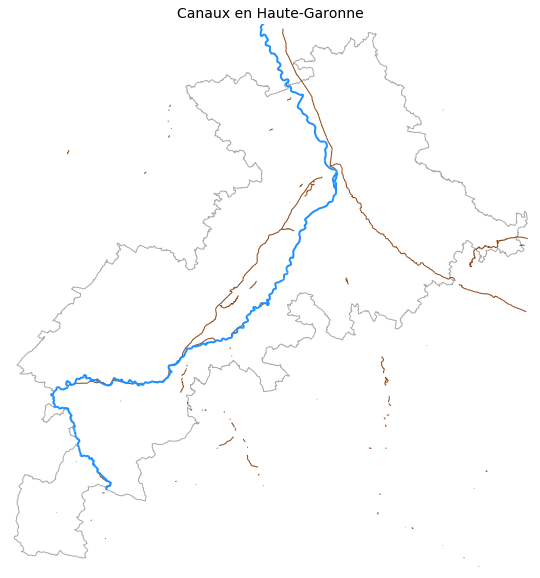

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartotools.crs import Lambert93, PlateCarree
from cartotools.osm import location, request, tags

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=Lambert93())

ax.set_extent(location('Haute-Garonne').extent)
ax.set_title("Canaux en Haute-Garonne", fontdict={'size': 14})
ax.outline_patch.set_visible(False)

location('Haute-Garonne').plot(ax)

(request('Haute-Garonne', 
         **tags.canal)
 .plot(ax, edgecolor='saddlebrown'))

(request('Haute-Garonne', 
         **tags.river,
         name='La Garonne')
 .plot(ax, edgecolor='dodgerblue',
       linewidth=2))

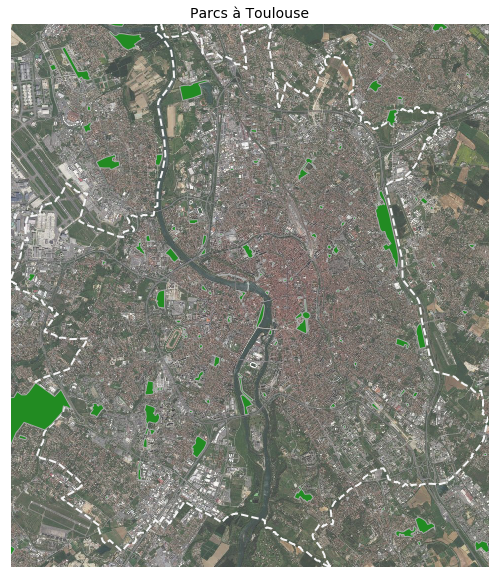

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartotools import img_tiles
from cartotools.crs import PlateCarree
from cartotools.osm import location, tags, request

ag = img_tiles.ArcGIS()
ag.cache_directory = "/data1/sat"
ag.notebook()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ag.crs)

ax.set_extent(location('Toulouse').extent)
ax.set_title("Parcs à Toulouse", fontdict={'size': 14})
ax.outline_patch.set_visible(False)

ax.add_image(ag, 13, alpha=.8)

(location('Toulouse')
 .plot(ax, facecolor='None', 
       edgecolor='whitesmoke', 
       linewidth=2,
       linestyle='dashed'))

(request('Toulouse',
         **tags.park).plot(ax, facecolor='forestgreen',))

## Segmentation

In [3]:
def plot_segmentation(iterator, number=3):
    fig, ax = plt.subplots(2, number, figsize=(number * 4, 8))

    for i, pair in enumerate(iterator):
        if i == number:
            break
        coords, (tile, mask) = pair
        ax[0, i].imshow(tile)
        ax[1, i].imshow(tile)
        ax[1, i].imshow(mask, alpha=.5)
        ax[0, i].axis('off')
        ax[1, i].axis('off')

    fig.tight_layout()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)


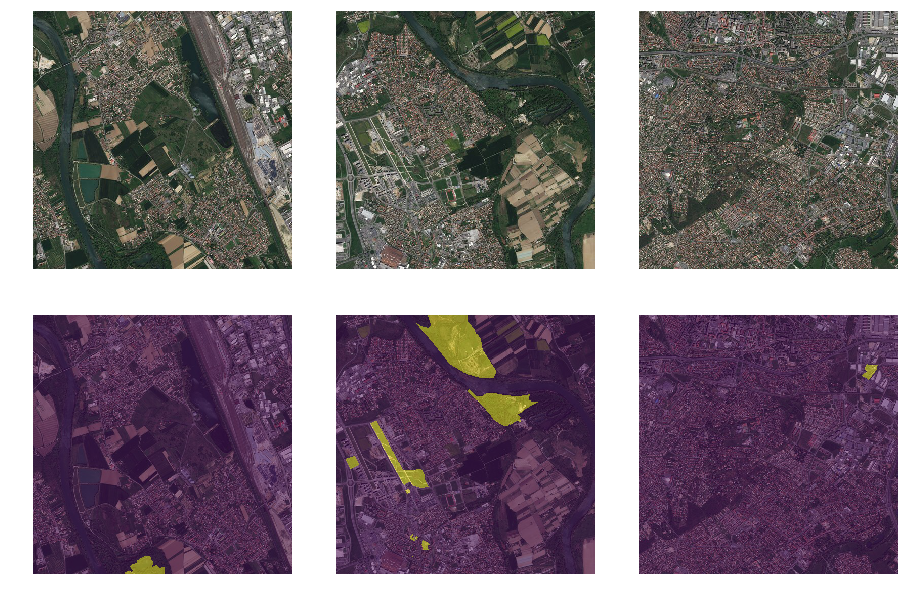

In [4]:
from pathlib import Path
from cartotools.tools import image_pairs
from tqdm import tqdm_notebook

park_toulouse_13 = image_pairs(
    name="Toulouse",
    tag={1: "park"},
    zoom_level=13, 
    cache_dir=Path("/data1/sat"),
    service='ArcGIS',
    augment=1
)

plot_segmentation(park_toulouse_13)


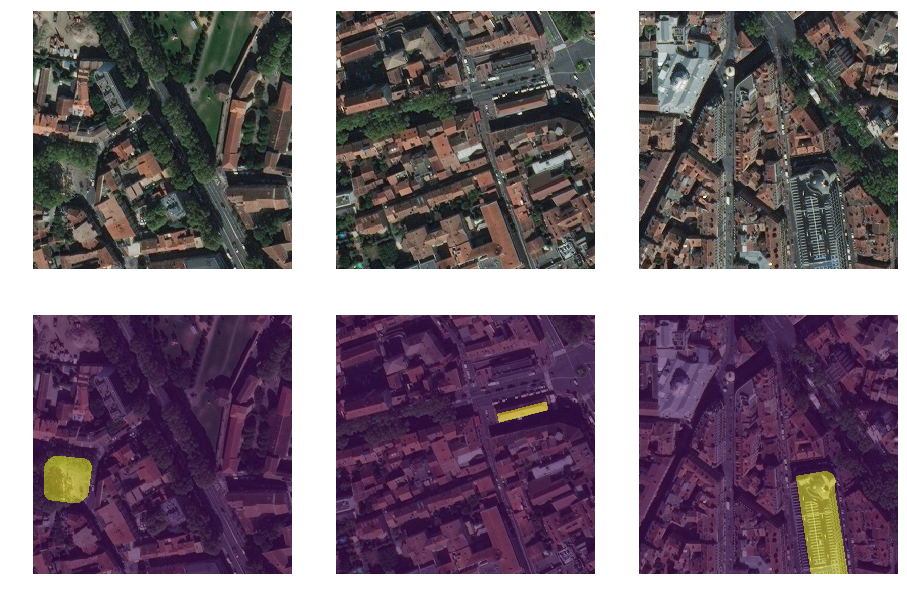

In [5]:
market_toulouse_17 = image_pairs(
    name="Toulouse Centre",
    tag={1: "marketplace"},
    zoom_level=17, 
    cache_dir=Path("/data1/sat"),
    service='ArcGIS',
    augment=1
)

plot_segmentation(market_toulouse_17)

## Detection

In [8]:
def plot_detection(iterator, number=4):
    fig, ax = plt.subplots(1, number, figsize=(number*4, 8))

    for i, pair in enumerate(iterator):
        if i == number:
            break
        coords, (tile, bboxes, ) = pair
        ax[i].imshow(tile, )
        for _, (xmin, ymin, xmax, ymax) in bboxes:
            ax[i].plot(
                [xmin, xmin, xmax, xmax, xmin],
                [ymin, ymax, ymax, ymin, ymin],
                color='darkred'
            )
        ax[i].axis('off')

    fig.tight_layout()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

In [18]:
location('Toulouse').extent

(1.3503956, 1.5153795, 43.532654, 43.668708)

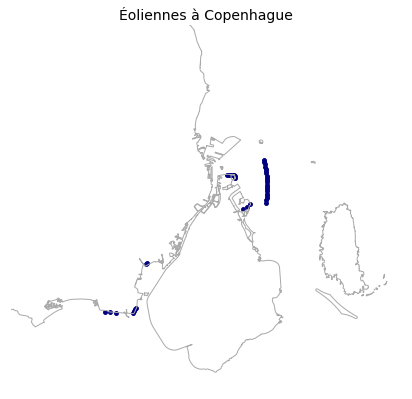

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartotools.crs import EuroPP, PlateCarree
from cartotools.osm import location, request, tags

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=EuroPP())

ax.set_extent((12.35, 12.83, 55.55, 55.8))
ax.set_title("Éoliennes à Copenhague", fontdict={'size': 14})
ax.outline_patch.set_visible(False)

# Capital region (Denmark)
location('Hovedstaden').plot(ax)

w = request('Copenhagen',
            **tags.wind_turbine)
# not smartly implemented yet
ax.scatter(
    list(point.xy[0][0] for point in w),
    list(point.xy[1][0] for point in w),
    transform=PlateCarree(),
    s=15,
    color='navy'
);


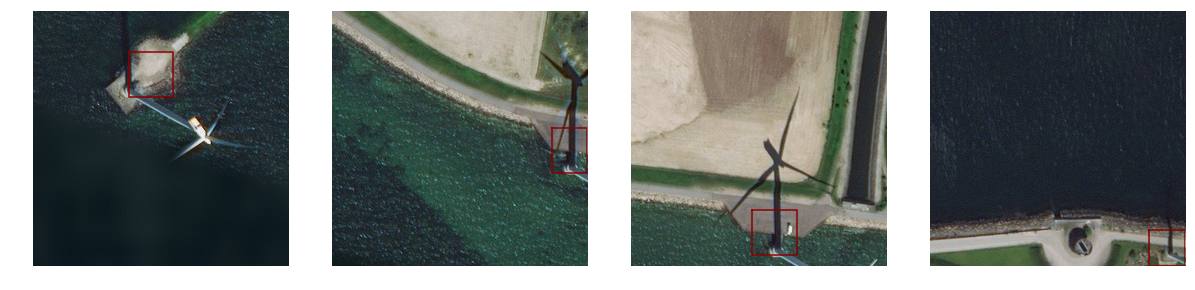

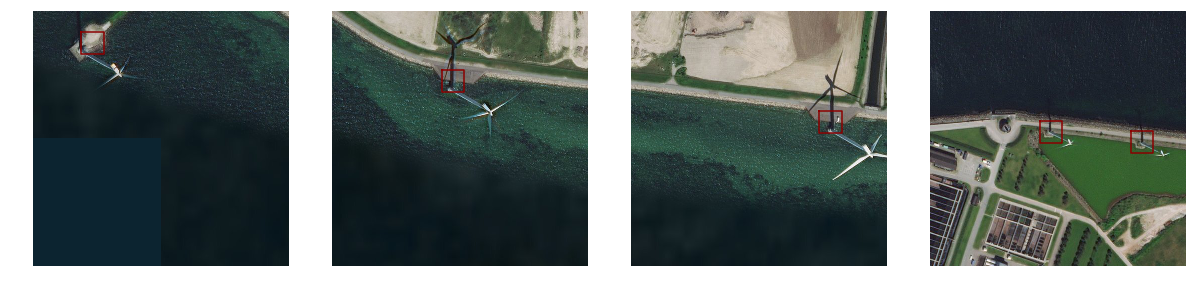

In [11]:
from cartotools.tools import bounding_box

wind_turbine_denmark = (
    lambda zoom_level:
        bounding_box(
            name="Copenhagen",
            tag={1: "wind_turbine"},
            zoom_level=zoom_level,
            cache_dir=Path("/data1/sat"),
            service='ArcGIS',
            augment=1
        )
)

plot_detection(wind_turbine_denmark(17))
plot_detection(wind_turbine_denmark(16))

## Use case: pylones and trees

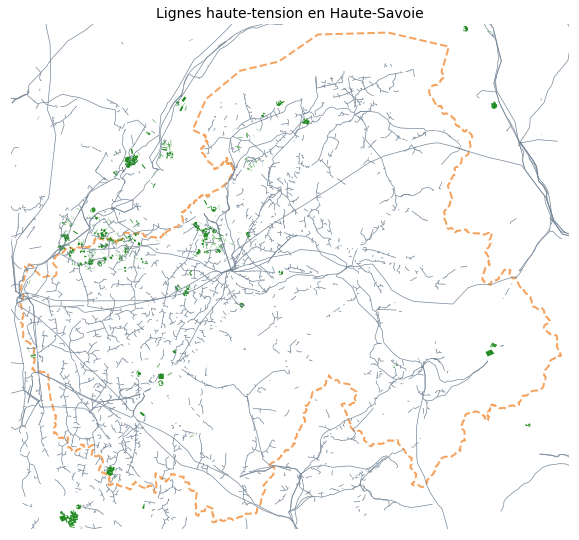

In [114]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=Lambert93())

ax.set_extent(location('Haute-Savoie').extent)
ax.set_title("Lignes haute-tension en Haute-Savoie", fontdict={'size': 14})
ax.outline_patch.set_visible(False)

(location('Haute-Savoie')
 .plot(ax, linewidth=2,
       edgecolor='sandybrown',
       linestyle='dashed'))

#(request('Haute-Savoie',
#        **tags.river)
# .plot(ax, edgecolor='dodgerblue',
#       linewidth=.6))
      
(request('Haute-Savoie',
         query_type="way",
         natural='tree_row')
 .plot(ax, edgecolor='forestgreen',
       linewidth=5))

(request('Haute-Savoie',
         query_type="way",
         power='line')
 .plot(ax, edgecolor='lightslategray',
       linewidth=.7))

In [131]:
def enrich_trees_poles(ax):
    (request('Haute-Savoie',
            **tags.river)
     .plot(ax, edgecolor='dodgerblue',
           linewidth=1))

    (request('Haute-Savoie',
            **tags.canal)
     .plot(ax, edgecolor='dodgerblue',
           linewidth=1))

    (request('Haute-Savoie',
             query_type="way",
             natural='tree_row')
     .plot(ax, edgecolor='forestgreen',
           linewidth=3))

    (request('Haute-Savoie',
             query_type="way",
             natural='wood')
     .plot(ax, edgecolor='forestgreen',
           linewidth=1))

    (request('Haute-Savoie',
             query_type="way",
             power='line')
     .plot(ax, edgecolor='firebrick',
           linewidth=.7))

    (request('Haute-Savoie',
             query_type="way",
             power='minor_line')
     .plot(ax, edgecolor='firebrick',
           linewidth=.7))

    w = request('Haute-Savoie',
                query_type="node",
                power='pole')
    # not smartly implemented yet
    ax.scatter(
        list(point.xy[0][0] for point in w),
        list(point.xy[1][0] for point in w),
        transform=PlateCarree(),
        s=15,
        color='darkslategray'
    )

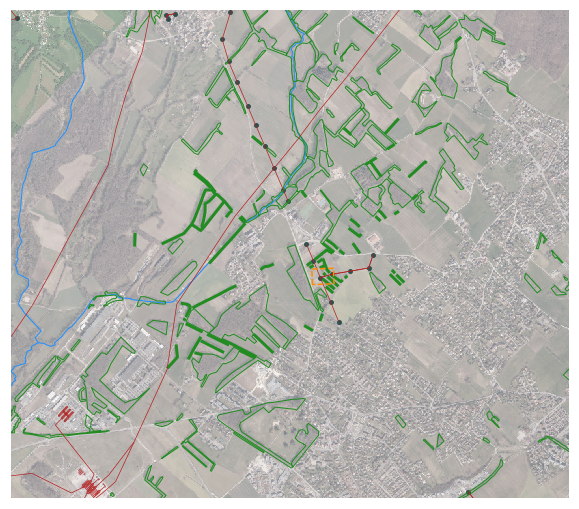

In [132]:
from cartotools.img_tiles import ArcGIS

ag = ArcGIS()
ag.cache_directory = "/data1/sat"
ag.notebook()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=Lambert93())

ax.set_extent((6.05, 6.1, 46.25, 46.28))
#ax.set_title("Lignes haute-tension en Haute-Savoie", fontdict={'size': 14})
ax.outline_patch.set_visible(False)
ax.add_image(ag, 16, alpha=.5)

enrich_trees_poles(ax)

xmin, xmax, ymin, ymax = (6.077, 6.079, 46.263, 46.264)
ax.plot(
    [xmin, xmin, xmax, xmax, xmin],
    [ymin, ymax, ymax, ymin, ymin],
    transform=PlateCarree(),
    linestyle='dashed',
    color='darkorange'
);

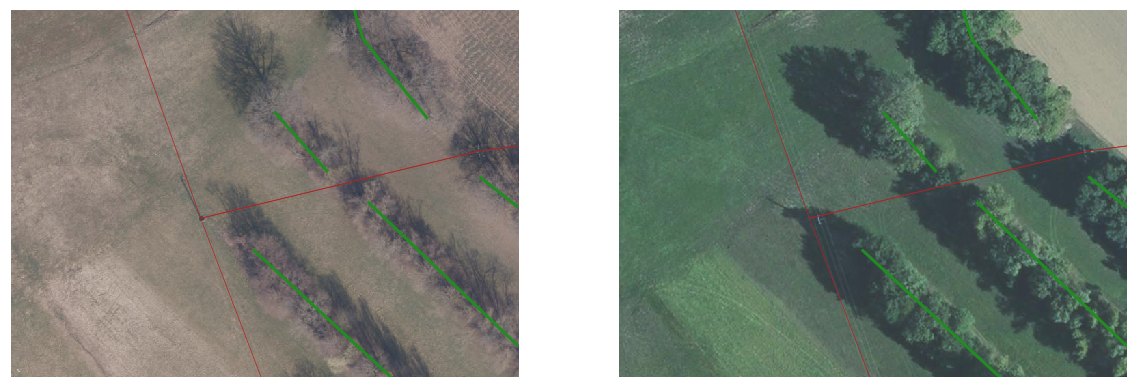

In [139]:
from cartotools.img_tiles import ArcGIS
from creepy_hack import IGN_Ortho_2016

ag = ArcGIS()
ag.cache_directory = "/data1/sat"
ag.notebook()

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(121, projection=ag.crs)

ax.set_extent((6.077, 6.079, 46.263, 46.264))
ax.outline_patch.set_visible(False)
ax.add_image(ag, 19, alpha=.9)

enrich_trees_poles(ax)

ign = IGN_Ortho_2016()
ign.cache_directory = '/data1/sat'
ign.notebook()

ax = fig.add_subplot(122, projection=ign.crs)

ax.set_extent((6.077, 6.079, 46.263, 46.264))
ax.outline_patch.set_visible(False)
ax.add_image(ign, 19, alpha=.9)

enrich_trees_poles(ax)